<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.5 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 44.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61826161 sha256=248dc1445b24c2889cd146233893bd8233925222a081be231bd1cbaa127c6351
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9436506 sha256=5afa553ef1717c72f2561deac39c43525325ec1d486b578d0497c6492913ef77
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [742]:

import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-BTC", interval="minute15", count=355)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                      open   high    low  close        volume         value
2023-04-03 20:00:00  371.0  372.0  369.0  372.0  7.931678e+05  2.934674e+08
2023-04-03 20:15:00  372.0  373.0  371.0  373.0  2.073829e+05  7.716901e+07
2023-04-03 20:30:00  372.0  373.0  371.0  371.0  2.844624e+05  1.056964e+08
2023-04-03 20:45:00  371.0  372.0  370.0  370.0  2.856187e+05  1.058335e+08
2023-04-03 21:00:00  370.0  372.0  369.0  372.0  3.262765e+05  1.208388e+08
...                    ...    ...    ...    ...           ...           ...
2023-04-07 11:30:00  703.0  705.0  685.0  691.0  8.912074e+06  6.160087e+09
2023-04-07 11:45:00  691.0  694.0  687.0  690.0  2.242461e+06  1.547327e+09
2023-04-07 12:00:00  691.0  703.0  690.0  691.0  3.246021e+06  2.256731e+09
2023-04-07 12:15:00  690.0  698.0  690.0  696.0  1.945005e+06  1.349270e+09
2023-04-07 12:30:00  696.0  708.0  696.0  708.0  2.253953e+06  1.579026e+09

[355 rows x 6 columns]


In [743]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-04-03 20:00:00,372.0
1,2023-04-03 20:15:00,373.0
2,2023-04-03 20:30:00,371.0
3,2023-04-03 20:45:00,370.0
4,2023-04-03 21:00:00,372.0
...,...,...
350,2023-04-07 11:30:00,691.0
351,2023-04-07 11:45:00,690.0
352,2023-04-07 12:00:00,691.0
353,2023-04-07 12:15:00,696.0


In [744]:
#prophet 불러옴
from fbprophet import Prophet

In [745]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [746]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=10, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


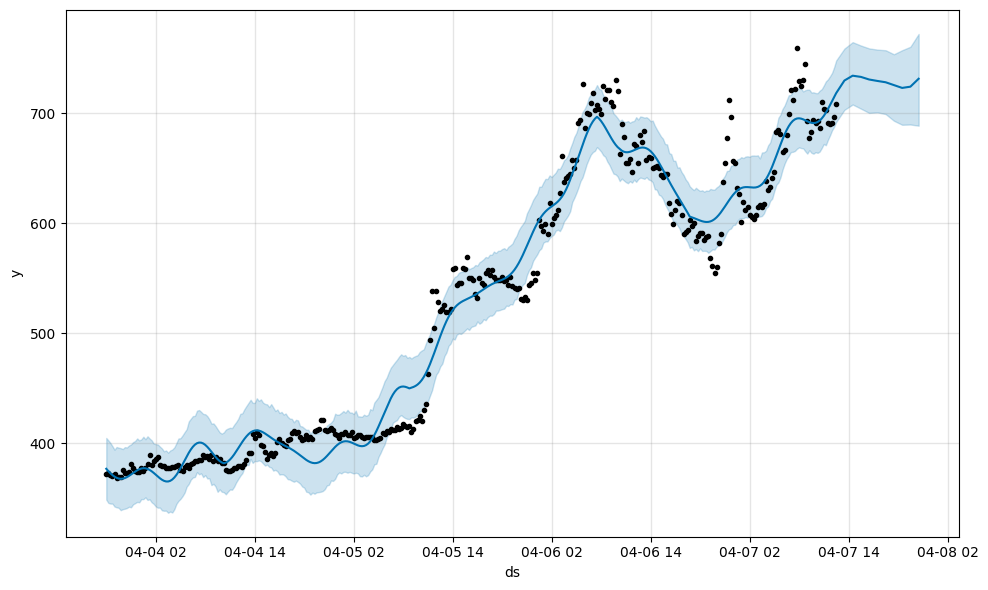

In [747]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


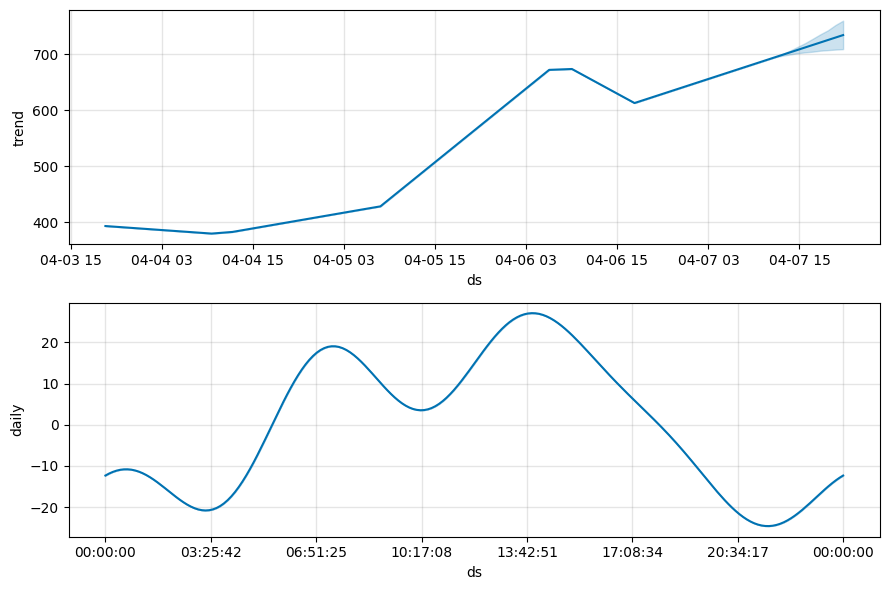

In [ ]:
#그래프2
fig2 = model.plot_components(forecast)